____ Group 17,Dammam ____

In [2]:
#Importing lib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [3]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import chart_studio#plotly
import chart_studio.plotly as py

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_row', 500)

# STC Dataset

In [4]:
#Reading STC dataset
STC= pd.read_csv("stc_sda_datathon.csv", low_memory=False)

In [5]:
#split the titles names
STC['original_name'] = STC['original_name'].str.replace(r', Season* \d*|, Episode* \d*|, S*\d*', ' ')

In [6]:
STC.head(3)

,Unnamed: 0,date_,user_id_maped,program_id,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,0.0,1.0,The Boss Baby
1,1,2017-05-27,26138.0,M0005792SD,100 Streets,40,MOVIE,0.0,0.0,Drama Movie100 Streets,Drama,0.0,0.0,100 Streets
2,2,2017-09-16,19082.0,S000805901001,"Heroes Reborn, Brave New World",1692,SERIES/EPISODES,1.0,1.0,Drama MovieBrave New World (HD),Drama,0.0,0.0,Heroes Reborn


In [7]:
#Checking if there is any missing values in the program description
STC.loc[STC['program_desc'].isnull()]

,Unnamed: 0,date_,user_id_maped,program_id,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
79,79,2018-01-02,21795.0,M0009931,Dunkirk (HD),6433,MOVIE,0.0,0.0,NaN,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk
283,283,2018-03-19,20613.0,S000490105006,"My Little Pony: Friendship Is Magic, S05 , App...",1284,SERIES/EPISODES,5.0,6.0,NaN,Animation,0.0,0.0,My Little Pony: Friendship Is Magic
303,303,2018-01-07,2711.0,M0009931,Dunkirk (HD),75,MOVIE,0.0,0.0,NaN,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk
305,305,2018-04-14,22430.0,M0009931,Dunkirk (HD),15,MOVIE,0.0,0.0,NaN,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk
335,335,2018-02-17,8074.0,M0009931,Dunkirk (HD),47,MOVIE,0.0,0.0,NaN,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359142,4359142,2018-04-22,8715.0,S000493103004,"Littlest Pet Shop, S03 , Winter Wonder Wha?",1279,SERIES/EPISODES,3.0,4.0,NaN,Animation,0.0,0.0,Littlest Pet Shop
4359175,4359175,2018-03-12,8715.0,S000810008004,"Dora The Explorer, Verdes Birthday Party!",1379,SERIES/EPISODES,8.0,4.0,NaN,Animation,0.0,1.0,Dora The Explorer
4359422,4359422,2017-10-01,8715.0,S000805901005,"Heroes Reborn, The Lions Den",55,SERIES/EPISODES,1.0,5.0,NaN,Drama,0.0,0.0,Heroes Reborn
4359811,4359811,2018-04-19,12505.0,M0009931,Dunkirk (HD),81,MOVIE,0.0,0.0,NaN,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk


In [8]:
#combine program name and program genre in one column called combined
STC['combined']=STC.apply(lambda x:'%s %s' % (x['program_name'],x['program_genre']),axis=1)

In [9]:
STC.head(3)

,Unnamed: 0,date_,user_id_maped,program_id,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,combined
0,0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,0.0,1.0,The Boss Baby,The Boss Baby (HD) Animation
1,1,2017-05-27,26138.0,M0005792SD,100 Streets,40,MOVIE,0.0,0.0,Drama Movie100 Streets,Drama,0.0,0.0,100 Streets,100 Streets Drama
2,2,2017-09-16,19082.0,S000805901001,"Heroes Reborn, Brave New World",1692,SERIES/EPISODES,1.0,1.0,Drama MovieBrave New World (HD),Drama,0.0,0.0,Heroes Reborn,"Heroes Reborn, Brave New World Drama"


In [10]:
#Replace missing vlues in program desc with combined values
STC[['program_desc']]= STC['program_desc'].fillna(STC['combined'])

In [11]:
#checking if all missing values are replaced 
STC.loc[STC['program_desc'].isnull()]

,Unnamed: 0,date_,user_id_maped,program_id,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,combined


In [12]:
#Checking up the replacement
STC[STC['program_id']=='M0009931']

,Unnamed: 0,date_,user_id_maped,program_id,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,combined
79,79,2018-01-02,21795.0,M0009931,Dunkirk (HD),6433,MOVIE,0.0,0.0,Dunkirk (HD) NOT_DEFINED_IN_UMS,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk,Dunkirk (HD) NOT_DEFINED_IN_UMS
303,303,2018-01-07,2711.0,M0009931,Dunkirk (HD),75,MOVIE,0.0,0.0,Dunkirk (HD) NOT_DEFINED_IN_UMS,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk,Dunkirk (HD) NOT_DEFINED_IN_UMS
305,305,2018-04-14,22430.0,M0009931,Dunkirk (HD),15,MOVIE,0.0,0.0,Dunkirk (HD) NOT_DEFINED_IN_UMS,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk,Dunkirk (HD) NOT_DEFINED_IN_UMS
335,335,2018-02-17,8074.0,M0009931,Dunkirk (HD),47,MOVIE,0.0,0.0,Dunkirk (HD) NOT_DEFINED_IN_UMS,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk,Dunkirk (HD) NOT_DEFINED_IN_UMS
389,389,2018-02-20,33768.0,M0009931,Dunkirk (HD),1,MOVIE,0.0,0.0,Dunkirk (HD) NOT_DEFINED_IN_UMS,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk,Dunkirk (HD) NOT_DEFINED_IN_UMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352811,4352811,2018-03-17,31711.0,M0009931,Dunkirk (HD),0,MOVIE,0.0,0.0,Dunkirk (HD) NOT_DEFINED_IN_UMS,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk,Dunkirk (HD) NOT_DEFINED_IN_UMS
4355237,4355237,2018-01-08,22535.0,M0009931,Dunkirk (HD),82,MOVIE,0.0,0.0,Dunkirk (HD) NOT_DEFINED_IN_UMS,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk,Dunkirk (HD) NOT_DEFINED_IN_UMS
4355401,4355401,2018-01-08,22535.0,M0009931,Dunkirk (HD),76,MOVIE,0.0,0.0,Dunkirk (HD) NOT_DEFINED_IN_UMS,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk,Dunkirk (HD) NOT_DEFINED_IN_UMS
4359811,4359811,2018-04-19,12505.0,M0009931,Dunkirk (HD),81,MOVIE,0.0,0.0,Dunkirk (HD) NOT_DEFINED_IN_UMS,NOT_DEFINED_IN_UMS,0.0,1.0,Dunkirk,Dunkirk (HD) NOT_DEFINED_IN_UMS


In [13]:
#viewing program_class unique values 
STC.program_class.unique()

array(['MOVIE', 'SERIES/EPISODES'], dtype=object)

In [14]:
#viewing stc program genres unique values 
STC.program_genre.unique()

array(['Animation', 'Drama', 'Biography', 'Action', 'Comedy', 'Horror',
       'NOT_DEFINED_IN_UMS', 'Thriller', 'Documentary', 'Family', 'Crime',
       'Romance', 'Sci-Fi', 'Adventure',
       'SERIES_NOT_ADDED_UNDER_ANY_GENRE', 'Wrestling'], dtype=object)

# RunTime

In [15]:
len(STC["program_name"].unique())


13384

In [16]:
STC['runtimeMinutes'] = (STC.groupby(['program_id',"episode","season"])['duration_seconds'].transform(np.mean)/60.0).astype(int)

In [17]:
max(STC['runtimeMinutes'])

1456

In [18]:
STC = STC.drop(columns = ["Unnamed: 0"])

# IMDB Dataset

In [19]:
#Reading external dataset (IMDb)
IMBd= pd.read_csv("datab.tsv",delimiter="\t",encoding="utf-8",low_memory=False).drop(columns = ['endYear','originalTitle'])

In [20]:
#viewing genres unique values 
IMBd.genres.unique().tolist()

['Documentary,Short',
 'Animation,Short',
 'Animation,Comedy,Romance',
 'Comedy,Short',
 'Short',
 'Short,Sport',
 'Romance',
 'Action,Documentary,Short',
 'Documentary,Short,Sport',
 'News,Short',
 'News,Short,Sport',
 'Comedy,Documentary,Short',
 'Drama,Short',
 'Action,Comedy,Documentary',
 'Fantasy,Short',
 'Horror,Short',
 'Comedy,Horror,Short',
 'Biography,Short',
 'Music,Short',
 'Documentary,News,Sport',
 'Fantasy,Horror,Short',
 'Short,War',
 'Crime,Short',
 'Short,Western',
 'Comedy,Short,Sport',
 'Comedy,Fantasy,Horror',
 'Biography,Drama,Short',
 'Romance,Short',
 'Family,Fantasy,Romance',
 'Drama,Short,War',
 'Drama,Family,Fantasy',
 'Adventure,Fantasy,Horror',
 'Comedy,Romance,Short',
 'Comedy,Fantasy,Short',
 'Animation,Comedy,Fantasy',
 'Family,Short',
 'Biography,Drama',
 'Documentary,News,Short',
 'Drama,History,Short',
 'Crime,Drama,Short',
 'Fantasy,Romance,Short',
 'Drama,Fantasy,Short',
 'Drama,Horror,Short',
 'History,Short',
 'Action,Adventure,Comedy',
 'Action,

In [21]:
#Dropping unnecessary genres from IMBd df
IMBd = IMBd.drop(IMBd[(IMBd.genres == 'Talk-Show')  | 
                      (IMBd.genres == 'News,Short') |
                      (IMBd.genres == 'Short,Sport') |
                      (IMBd.genres == 'Documentary,News,Short') |
                      (IMBd.genres == 'News,Short,War') |
                      (IMBd.genres == '\\N') |
                      (IMBd.genres == 'Sport') |
                      (IMBd.genres == 'Documentary,Sport') |
                      (IMBd.genres == 'Music') |
                      (IMBd.genres == 'Reality-TV') |
                      (IMBd.genres == 'Documentary,News,Sport') |
                      (IMBd.genres == 'News,Short,Sport') |
                      (IMBd.genres == 'News')].index)

In [22]:
IMBd.head(5)

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,0,1892,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short"


In [23]:
#checking the IMDB title types
IMBd.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [24]:
#Replacing some values
IMBd['titleType']= IMBd['titleType'].replace(['short','tvMovie','tvSeries', 'tvEpisode',
                                             'tvShort','tvMiniSeries','tvSpecial'], 
                                             ['MOVIE','MOVIE','SERIES/EPISODES','SERIES/EPISODES',
                                             'SERIES/EPISODES','SERIES/EPISODES','SERIES/EPISODES'])

#Applying upper method on titleType column 
IMBd['titleType']= IMBd['titleType'].apply(lambda x: x.upper())
IMBd.head(2)

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,MOVIE,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,MOVIE,Le clown et ses chiens,0,1892,5,"Animation,Short"


In [25]:
#Reading the rating Dataset to get the global rating column
rate = pd.read_csv("datat.tsv", sep="\t",low_memory=False).drop(columns = ['averageRating'])

In [26]:
rate.head(5)

,tconst,numVotes
0,tt0000001,1559
1,tt0000002,188
2,tt0000003,1222
3,tt0000004,114
4,tt0000005,1952


In [27]:
IMDB_rate = IMBd.merge(rate, on='tconst')

In [28]:
IMDB_rate.head(3)

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,numVotes
0,tt0000001,MOVIE,Carmencita,0,1894,1,"Documentary,Short",1559
1,tt0000002,MOVIE,Le clown et ses chiens,0,1892,5,"Animation,Short",188
2,tt0000003,MOVIE,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance",1222


# Merging IMDB data with STC Data

In [29]:
IMDB_rate = IMDB_rate.rename(columns={"primaryTitle":"original_name"})

In [30]:
result = pd.merge(left=STC,right=IMDB_rate, how='left', left_on='original_name', right_on='original_name')

In [31]:
result['runtimeMinutes_y']=result['runtimeMinutes_y'].replace(['\\N'],0)
result['runtimeMinutes_y']=result['runtimeMinutes_y'].replace("nan",0)

In [32]:
result = result.fillna(0)

In [33]:
print(result["runtimeMinutes_y"][0]==0)

False


In [34]:
result.head(50)

,date_,user_id_maped,program_id,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,...,original_name,combined,runtimeMinutes_x,tconst,titleType,isAdult,startYear,runtimeMinutes_y,genres,numVotes
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,...,The Boss Baby,The Boss Baby (HD) Animation,6,tt3874544,MOVIE,0.0,2017,97,"Adventure,Animation,Comedy",98612.0
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,...,The Boss Baby,The Boss Baby (HD) Animation,6,tt7248172,SERIES/EPISODES,0.0,2017,0,"Comedy,Talk-Show",5.0
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,...,The Boss Baby,The Boss Baby (HD) Animation,6,tt7816394,SERIES/EPISODES,0.0,2018,0,Comedy,38.0
3,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,...,The Boss Baby,The Boss Baby (HD) Animation,6,tt8286550,SERIES/EPISODES,0.0,2018,0,Comedy,35.0
4,2017-05-27,26138.0,M0005792SD,100 Streets,40,MOVIE,0.0,0.0,Drama Movie100 Streets,Drama,...,100 Streets,100 Streets Drama,5,tt2990126,MOVIE,0.0,2016,93,Drama,3448.0
5,2017-09-16,19082.0,S000805901001,"Heroes Reborn, Brave New World",1692,SERIES/EPISODES,1.0,1.0,Drama MovieBrave New World (HD),Drama,...,Heroes Reborn,"Heroes Reborn, Brave New World Drama",24,0,0,0.0,0,0,0,0.0
6,2017-05-21,7946.0,M0004410,Moana (HD),17,MOVIE,0.0,0.0,Animation MovieMoana (HD),Animation,...,Moana,Moana (HD) Animation,11,tt0017162,MOVIE,0.0,1926,77,Documentary,487.0
7,2017-05-21,7946.0,M0004410,Moana (HD),17,MOVIE,0.0,0.0,Animation MovieMoana (HD),Animation,...,Moana,Moana (HD) Animation,11,tt1465102,SERIES/EPISODES,0.0,2009,210,"Biography,Drama",157.0
8,2017-05-21,7946.0,M0004410,Moana (HD),17,MOVIE,0.0,0.0,Animation MovieMoana (HD),Animation,...,Moana,Moana (HD) Animation,11,tt3521164,MOVIE,0.0,2016,107,"Adventure,Animation,Comedy",238739.0
9,2017-05-21,7946.0,M0004410,Moana (HD),17,MOVIE,0.0,0.0,Animation MovieMoana (HD),Animation,...,Moana,Moana (HD) Animation,11,tt6617756,SERIES/EPISODES,0.0,2017,0,Comedy,47.0


In [35]:
result["runtimeMinutes"] = [result["runtimeMinutes_x"][line] if result["runtimeMinutes_y"][line]==0 else result["runtimeMinutes_y"][line] for line in range(len(result)) ]

In [36]:
STC_IMDB = result

In [37]:
STC_IMDB.head(5)

,date_,user_id_maped,program_id,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,...,combined,runtimeMinutes_x,tconst,titleType,isAdult,startYear,runtimeMinutes_y,genres,numVotes,runtimeMinutes
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,...,The Boss Baby (HD) Animation,6,tt3874544,MOVIE,0.0,2017,97,"Adventure,Animation,Comedy",98612.0,97
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,...,The Boss Baby (HD) Animation,6,tt7248172,SERIES/EPISODES,0.0,2017,0,"Comedy,Talk-Show",5.0,6
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,...,The Boss Baby (HD) Animation,6,tt7816394,SERIES/EPISODES,0.0,2018,0,Comedy,38.0,6
3,2017-08-16,6928.0,M0009670,The Boss Baby (HD),17,MOVIE,0.0,0.0,Animation MovieThe Boss Baby (HD),Animation,...,The Boss Baby (HD) Animation,6,tt8286550,SERIES/EPISODES,0.0,2018,0,Comedy,35.0,6
4,2017-05-27,26138.0,M0005792SD,100 Streets,40,MOVIE,0.0,0.0,Drama Movie100 Streets,Drama,...,100 Streets Drama,5,tt2990126,MOVIE,0.0,2016,93,Drama,3448.0,93


In [38]:
#drop runtime_y runtime_x
STC_IMDB = STC_IMDB.drop(columns = ['runtimeMinutes_y','runtimeMinutes_x'])

In [39]:
#selecting certain columns instead of dropping
STC_IMDB = pd.DataFrame(STC_IMDB
             [['date_','user_id_maped','program_id',
             'program_name','original_name','startYear',
             'program_genre','program_desc','program_class',
             'hd','season','episode','isAdult','combined',
             'duration_seconds','runtimeMinutes','numVotes']])

In [40]:
STC_IMDB.head(3)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,season,episode,isAdult,combined,duration_seconds,runtimeMinutes,numVotes
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,0.0,0.0,0.0,The Boss Baby (HD) Animation,17,97,98612.0
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,0.0,0.0,0.0,The Boss Baby (HD) Animation,17,6,5.0
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,0.0,0.0,0.0,The Boss Baby (HD) Animation,17,6,38.0


In [41]:
STC_IMDB.tail(2)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,season,episode,isAdult,combined,duration_seconds,runtimeMinutes,numVotes
10938452,2017-10-30,717.0,M0009712,Unforgettable (HD),Unforgettable,2017,Drama,Drama MovieUnforgettable (HD),MOVIE,1.0,0.0,0.0,0.0,Unforgettable (HD) Drama,95,41,1279.0
10938453,2018-02-11,4856.0,M0010050,The Mountain Between Us (HD),The Mountain Between Us,2017,Drama,Drama MovieThe Mountain Between Us (HD),MOVIE,1.0,0.0,0.0,0.0,The Mountain Between Us (HD) Drama,31,112,60235.0


In [42]:
#viewing program_class unique values 
STC.program_class.unique()

array(['MOVIE', 'SERIES/EPISODES'], dtype=object)

In [43]:
#Checking Null
STC_IMDB.isnull().sum()

date_               0
user_id_maped       0
program_id          0
program_name        0
original_name       0
startYear           0
program_genre       0
program_desc        0
program_class       0
hd                  0
season              0
episode             0
isAdult             0
combined            0
duration_seconds    0
runtimeMinutes      0
numVotes            0
dtype: int64

In [44]:
len(STC_IMDB)

10938454

In [45]:
STC_IMDB.count()

date_               10938454
user_id_maped       10938454
program_id          10938454
program_name        10938454
original_name       10938454
startYear           10938454
program_genre       10938454
program_desc        10938454
program_class       10938454
hd                  10938454
season              10938454
episode             10938454
isAdult             10938454
combined            10938454
duration_seconds    10938454
runtimeMinutes      10938454
numVotes            10938454
dtype: int64

# Popularity Score

In [46]:
## Finding How Many Users Entered Each Movie even if they didn't complete it.
# this will help us to sort them as the higher no.users who opened the movie, the more popular it is 

In [47]:
#1. finding the populraity score from the count of users who entered each movie 
popul= STC_IMDB[['program_id', 'user_id_maped']]
CountUsers= popul.program_id.value_counts().reset_index(name='Popularity')
CountUsers.head(5)

,index,Popularity
0,M0009855,668304
1,M0009670,349312
2,M0009712,227216
3,M0009852,171291
4,M0009713,169322


In [48]:
#checking if the No.index truely equal to No.programs
test=CountUsers['index'].unique()
test.size

13504

In [49]:
test2=STC_IMDB['program_id'].unique()
test2.size

13504

In [50]:
#2. Joining the popularity column into the dataset 
#changing the index column name to program_id 
CountUsers['program_id']= CountUsers['index']
ppl= CountUsers.drop('index', axis=1 )
ppl.tail(2)

,Popularity,program_id
13502,1,S000281703003
13503,1,S000272015011


In [51]:
#merging the popularity dataset with STC_IMDB 
STC_IMDB1=pd.merge(STC_IMDB,ppl, on='program_id', how='left')
#merging the STC_IMDB1 to STC_IMDB
STC_IMDB=STC_IMDB1

# Original Duration (runTimeMinutes) Conversion & 3 Points Rating

In [52]:
#handling with RunTime column 
STC_IMDB['runtimeMinutes']=STC_IMDB['runtimeMinutes'].replace(['\\N'],0)
(STC_IMDB.loc[STC_IMDB['runtimeMinutes']== "\\N"]).count()

date_               0
user_id_maped       0
program_id          0
program_name        0
original_name       0
startYear           0
program_genre       0
program_desc        0
program_class       0
hd                  0
season              0
episode             0
isAdult             0
combined            0
duration_seconds    0
runtimeMinutes      0
numVotes            0
Popularity          0
dtype: int64

In [53]:
#change runtimeMinute to runTimeSecond 
STC_IMDB['runTimeSecond']= STC_IMDB.apply(lambda row:(row['runtimeMinutes']* 60),axis=1)

In [54]:
STC_IMDB['runtimeMinutes']=STC_IMDB['runtimeMinutes'].fillna(0)
STC_IMDB['runTimeSecond']=STC_IMDB['runTimeSecond'].fillna(0)

In [55]:
#calculating max watch (the accumulative duration) for movie per each user 
sumWatchPerUser= (STC_IMDB.groupby(['program_id','user_id_maped'])['duration_seconds'].max()).fillna(method='ffill').reset_index(name='sumWatchPerUser')

In [56]:
#Joining the max watch with the dataset 
pd.merge(STC_IMDB, sumWatchPerUser, on=('program_id', 'user_id_maped'), how='right' ) 
STC_IMDB['sumWatchPerUser']= sumWatchPerUser['sumWatchPerUser']
#filling the movies that have no re-watch (Nan) by the users with 0 values 
STC_IMDB['sumWatchPerUser'] = STC_IMDB['sumWatchPerUser'].fillna(0)

In [57]:
# Changing the types of the column to allow comparison 
(STC_IMDB.loc[STC_IMDB['sumWatchPerUser']== "NaN"]).count()
STC_IMDB['sumWatchPerUser']=STC_IMDB['sumWatchPerUser'].astype(float)
STC_IMDB['runTimeSecond']=STC_IMDB['runTimeSecond'].astype(float)

In [58]:
# Finding the number of watches of a movie by a user(from the accumlative duration(sumWatchPerUser)\the true runtime)
def counn(STC_IMDB):
    try:
        return STC_IMDB['sumWatchPerUser']/STC_IMDB['runTimeSecond']
    except ZeroDivisionError:
        return 0
STC_IMDB['NoOfWatch']= STC_IMDB.apply(counn, axis=1)

In [59]:
#Calculate Rating 

def rating(STC_IMDB):

    if STC_IMDB['duration_seconds'] >= STC_IMDB['runTimeSecond'] and STC_IMDB['NoOfWatch'] > 1:

        val = 3
        
    elif STC_IMDB['duration_seconds'] >= STC_IMDB['runTimeSecond'] and STC_IMDB['NoOfWatch'] == 1:

        val = 2
        
    else:

        val = 1

    return val

STC_IMDB['UserRating'] = STC_IMDB.apply(rating, axis=1)

# Binary Rating (like/dislike) 

In [60]:
#1. Finding The Number of times the user re-watched a movie in different dates
NumberOfReWatches= STC_IMDB.groupby(['program_id','user_id_maped'])['date_'].count().reset_index(name='NumberOfReWatches')
NumberOfReWatches.head(5)

,program_id,user_id_maped,NumberOfReWatches
0,888888020012832206,18408.0,3
1,EWWE0005796SD,987.0,6
2,EWWE0005796SD,1152.0,12
3,EWWE0005796SD,3011.0,12
4,EWWE0005796SD,3434.0,6


In [61]:
#2 Joining the No.Re-watch with the dataset 
pd.merge(STC_IMDB, NumberOfReWatches, on=('program_id', 'user_id_maped'), how='left' ) 
STC_IMDB['NumberOfReWatches']= NumberOfReWatches['NumberOfReWatches']
#filling the movies that have no re-watch (Nan) by the users with 0 values 
STC_IMDB1['NumberOfReWatches'] = STC_IMDB1['NumberOfReWatches'].fillna(0)

In [62]:
### Binary Rating (like or dislike)
# Based on if the user watched the movie completly and may rewatched than it's like

In [63]:
#3 checking if the user complete the movie or not 
STC_IMDB['Completed'] = np.where(STC_IMDB['duration_seconds']>= STC_IMDB['runTimeSecond'], '1', '0')

In [64]:
#4 User Rating (like or dislike)
STC_IMDB.loc[(STC_IMDB['Completed']=="1")| (STC_IMDB['NumberOfReWatches']!=0), 'Like_Dislike']='Like'
STC_IMDB.loc[(STC_IMDB['Completed']=="0")& (STC_IMDB['NumberOfReWatches']==0), 'Like_Dislike']='DisLike'

In [65]:
STC_IMDB.head(3)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,...,runtimeMinutes,numVotes,Popularity,runTimeSecond,sumWatchPerUser,NoOfWatch,UserRating,NumberOfReWatches,Completed,Like_Dislike
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,97,98612.0,349312,9.797980e+119,1986.0,2.026948e-117,1,3.0,0,Like
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,6,5.0,349312,3.600000e+02,31.0,8.611111e-02,1,6.0,0,Like
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,6,38.0,349312,3.600000e+02,30.0,8.333333e-02,1,12.0,0,Like


# User Profiling::

## 1. The Number of Users In Each Account:-
Note: the given dataset indicates range of dates between 2017-2018 >> one year (approximatly)
_______________________________________________________________________________________________________
Hypothesis:-
According to the note, an assumption of user rewatching the program in the same year indicates that it was rewatched by different user in the same account. Therefore, The Number of Users in an account equal to the mode of the group of Number of Rewatches of all the programs by a user plus 1. Example:user1 has No.rewatches for 6 movies as follow: 0 0 1 1 1 3  >> the number of users will be 1+1=2

This assumption doesn't include Animation (or accounts that watch Animation), since they have so many rewatches and that means the user or one of the users is maybe a child. 

In [66]:
#1 The Number of users: finding the mode of no.rewatch after grouping them for each user (then adding 1):
xj= STC_IMDB.groupby(['user_id_maped'])['NumberOfReWatches'].apply(pd.Series.mode).reset_index(name='NumberOfUsers')
xj['NumberOfUsers']= xj['NumberOfUsers']+1
xj.head(5)

,user_id_maped,level_1,NumberOfUsers
0,1.0,0,1.0
1,2.0,0,1.0
2,3.0,0,1.0
3,4.0,0,1.0
4,5.0,0,2.0


In [67]:
#2 dropping the level_1 column before joining:
xj= xj.drop('level_1', axis=1 )

In [68]:
#3 Merging the column of Number of users with the dataset:
STC_IMDB=pd.merge(STC_IMDB, xj, on=('user_id_maped'), how='left' )

In [69]:
#4 Checking the dataset:
STC_IMDB.head(5)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,...,numVotes,Popularity,runTimeSecond,sumWatchPerUser,NoOfWatch,UserRating,NumberOfReWatches,Completed,Like_Dislike,NumberOfUsers
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,98612.0,349312,9.797980e+119,1986.0,2.026948e-117,1,3.0,0,Like,13.0
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,5.0,349312,3.600000e+02,31.0,8.611111e-02,1,6.0,0,Like,13.0
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,38.0,349312,3.600000e+02,30.0,8.333333e-02,1,12.0,0,Like,13.0
3,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,35.0,349312,3.600000e+02,30.0,8.333333e-02,1,12.0,0,Like,13.0
4,2017-05-27,26138.0,M0005792SD,100 Streets,100 Streets,2016,Drama,Drama Movie100 Streets,MOVIE,0.0,...,3448.0,151,9.393939e+119,31.0,3.300000e-119,1,6.0,0,Like,2.0


## 2. Finding The Age of Users (Adult or Not Adult):-
Note: the Movies are classified as suitable for Adults or not. So, the age of users will be adult or not

In [70]:
#1 Seperate the isAdult column into 2 columns: one contain the Adults only and the other Not Adults.
STC_IMDB.loc[STC_IMDB['isAdult']==1, 'AdultMovie']=1
STC_IMDB.loc[STC_IMDB['isAdult']==0, 'NotAdultMovie']=1

In [71]:
#Checking how many Adults rows in the dataset
STC_IMDB.loc[STC_IMDB['AdultMovie']==1].size

3215268

In [72]:
#Checking how many not Adults rows in the dataset
STC_IMDB.loc[STC_IMDB['NotAdultMovie']==1].size

303359224

In [73]:
# Checking if the seperation is done correctly 
STC_IMDB.count()

date_                10949089
user_id_maped        10949089
program_id           10949089
program_name         10949089
original_name        10949089
startYear            10949089
program_genre        10949089
program_desc         10949089
program_class        10949089
hd                   10949089
season               10949089
episode              10949089
isAdult              10949089
combined             10949089
duration_seconds     10949089
runtimeMinutes       10949089
numVotes             10949089
Popularity           10949089
runTimeSecond        10949089
sumWatchPerUser      10949089
NoOfWatch            10949089
UserRating           10949089
NumberOfReWatches    10949089
Completed            10949089
Like_Dislike         10949089
NumberOfUsers        10949089
AdultMovie             114831
NotAdultMovie        10834258
dtype: int64

In [74]:
STC_IMDB.head(3)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,...,runTimeSecond,sumWatchPerUser,NoOfWatch,UserRating,NumberOfReWatches,Completed,Like_Dislike,NumberOfUsers,AdultMovie,NotAdultMovie
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,9.797980e+119,1986.0,2.026948e-117,1,3.0,0,Like,13.0,NaN,1.0
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,3.600000e+02,31.0,8.611111e-02,1,6.0,0,Like,13.0,NaN,1.0
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,3.600000e+02,30.0,8.333333e-02,1,12.0,0,Like,13.0,NaN,1.0


In [75]:
#2 Calculating the sum of Not-Adults Movies Watched by each user
GG= STC_IMDB.groupby(['user_id_maped'])['NotAdultMovie'].count().reset_index(name='SumNotAdultsMov')
GG.head(3)

,user_id_maped,SumNotAdultsMov
0,1.0,59
1,2.0,2
2,3.0,15


In [76]:
#3 merging the sum of Not-Adults column to the STC_IMDB dataset
STC_IMDB=pd.merge(STC_IMDB, GG, on=('user_id_maped'), how='left' )

In [77]:
#4 Calculating the sum of Adults Movies Watched by each user
bb= STC_IMDB.groupby(['user_id_maped'])['AdultMovie'].count().reset_index(name='SumAdultsMov')
bb.tail(5)

,user_id_maped,SumAdultsMov
33552,34279.0,15
33553,34280.0,1
33554,34281.0,0
33555,34282.0,0
33556,34283.0,5


In [78]:
#5 merging the sum of Adults column to the STC_IMDB dataset
STC_IMDB=pd.merge(STC_IMDB, bb, on=('user_id_maped'), how='left' )

In [79]:
# Checking the dataset
STC_IMDB.head(3)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,...,NoOfWatch,UserRating,NumberOfReWatches,Completed,Like_Dislike,NumberOfUsers,AdultMovie,NotAdultMovie,SumNotAdultsMov,SumAdultsMov
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,2.026948e-117,1,3.0,0,Like,13.0,NaN,1.0,4,0
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,8.611111e-02,1,6.0,0,Like,13.0,NaN,1.0,4,0
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,8.333333e-02,1,12.0,0,Like,13.0,NaN,1.0,4,0


In [80]:
#6 Finding the user(s) age by comparing the sum of adults movies with the sum of not adults movies 
# Finding the age of maximum of 3 users only (if there is) for each account 

In [81]:
# one user accounts (most appeared accounts in the dataset): User1 age 
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==1)& (STC_IMDB['SumNotAdultsMov']> STC_IMDB['SumAdultsMov']), 'User1Age']='Not Adult'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==1)& (STC_IMDB['SumNotAdultsMov']< STC_IMDB['SumAdultsMov']), 'User1Age']='Adult'

In [82]:
# two users accounts (second most appeared accounts): User1 and User2 ages:
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==2)& (STC_IMDB['SumNotAdultsMov']> STC_IMDB['SumAdultsMov']), 'User1Age']='Not Adult'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==2)& (STC_IMDB['SumNotAdultsMov']< STC_IMDB['SumAdultsMov']), 'User1Age']='Adult'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==2)& (STC_IMDB['SumAdultsMov']==0), 'User2Age']='Not Adult'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==2)& (STC_IMDB['SumAdultsMov']!=0), 'User2Age']='Adult'

In [83]:
# three users accounts (third most appeared accounts(only few)) user1, user2, user3 ages: 
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==3)& (STC_IMDB['SumNotAdultsMov']> STC_IMDB['SumAdultsMov']), 'User1Age']='Not Adult'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==3)& (STC_IMDB['SumNotAdultsMov']< STC_IMDB['SumAdultsMov']), 'User1Age']='Adult'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==3)& (STC_IMDB['SumAdultsMov']==0), 'User2Age']='Not Adult'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==3)& (STC_IMDB['SumAdultsMov']!=0), 'User2Age']='Adult'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==3)& (STC_IMDB['SumNotAdultsMov']> STC_IMDB['SumAdultsMov']), 'User3Age']='Not Adult'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==3)& (STC_IMDB['SumNotAdultsMov']< STC_IMDB['SumAdultsMov']), 'User3Age']='Adult'

In [84]:
#7 Checking the dataset
STC_IMDB.head(50)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,...,Completed,Like_Dislike,NumberOfUsers,AdultMovie,NotAdultMovie,SumNotAdultsMov,SumAdultsMov,User1Age,User2Age,User3Age
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,0,Like,13.0,NaN,1.0,4,0,NaN,NaN,NaN
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,0,Like,13.0,NaN,1.0,4,0,NaN,NaN,NaN
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,0,Like,13.0,NaN,1.0,4,0,NaN,NaN,NaN
3,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,0,Like,13.0,NaN,1.0,4,0,NaN,NaN,NaN
4,2017-05-27,26138.0,M0005792SD,100 Streets,100 Streets,2016,Drama,Drama Movie100 Streets,MOVIE,0.0,...,0,Like,2.0,NaN,1.0,100,7,Not Adult,Adult,NaN
5,2017-09-16,19082.0,S000805901001,"Heroes Reborn, Brave New World",Heroes Reborn,0,Drama,Drama MovieBrave New World (HD),SERIES/EPISODES,0.0,...,1,Like,2.0,NaN,1.0,396,0,Not Adult,Not Adult,NaN
6,2017-05-21,7946.0,M0004410,Moana (HD),Moana,1926,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,0,Like,2.0,NaN,1.0,26,0,Not Adult,Not Adult,NaN
7,2017-05-21,7946.0,M0004410,Moana (HD),Moana,1926,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,0,Like,3.0,NaN,1.0,26,0,Not Adult,Not Adult,Not Adult
8,2017-05-21,7946.0,M0004410,Moana (HD),Moana,2009,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,0,Like,2.0,NaN,1.0,26,0,Not Adult,Not Adult,NaN
9,2017-05-21,7946.0,M0004410,Moana (HD),Moana,2009,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,0,Like,3.0,NaN,1.0,26,0,Not Adult,Not Adult,Not Adult


## 3. The Gender of Users (Female or Male):-
Note: Finding the gender based on the program genres watched by users. I.E. Classifying the Romance and Drama programs as Female. While  Action, Thriller,Wrestling, and Crime as male 

In [85]:
# Checking the unique program genres in the dataset:
STC_IMDB['program_genre'].unique()

array(['Animation', 'Drama', 'Biography', 'Action', 'Comedy', 'Horror',
       'NOT_DEFINED_IN_UMS', 'Thriller', 'Documentary', 'Family', 'Crime',
       'Romance', 'Sci-Fi', 'Adventure',
       'SERIES_NOT_ADDED_UNDER_ANY_GENRE', 'Wrestling'], dtype=object)

In [86]:
#1 Classifying the programs into female and male programs in seperate columns: 
STC_IMDB.loc[STC_IMDB['program_genre']=='Romance', 'FemaleMov']=1
STC_IMDB.loc[STC_IMDB['program_genre']=='Drama', 'FemaleMov']=1
STC_IMDB.loc[STC_IMDB['program_genre']=='Action', 'maleMov']=1
STC_IMDB.loc[STC_IMDB['program_genre']=='Thriller', 'maleMov']=1
STC_IMDB.loc[STC_IMDB['program_genre']=='Wrestling', 'maleMov']=1
STC_IMDB.loc[STC_IMDB['program_genre']=='Crime', 'maleMov']=1

In [87]:
# Checking the dataset
STC_IMDB.head(50)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,...,NumberOfUsers,AdultMovie,NotAdultMovie,SumNotAdultsMov,SumAdultsMov,User1Age,User2Age,User3Age,FemaleMov,maleMov
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,13.0,NaN,1.0,4,0,NaN,NaN,NaN,NaN,NaN
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,13.0,NaN,1.0,4,0,NaN,NaN,NaN,NaN,NaN
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,13.0,NaN,1.0,4,0,NaN,NaN,NaN,NaN,NaN
3,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,13.0,NaN,1.0,4,0,NaN,NaN,NaN,NaN,NaN
4,2017-05-27,26138.0,M0005792SD,100 Streets,100 Streets,2016,Drama,Drama Movie100 Streets,MOVIE,0.0,...,2.0,NaN,1.0,100,7,Not Adult,Adult,NaN,1.0,NaN
5,2017-09-16,19082.0,S000805901001,"Heroes Reborn, Brave New World",Heroes Reborn,0,Drama,Drama MovieBrave New World (HD),SERIES/EPISODES,0.0,...,2.0,NaN,1.0,396,0,Not Adult,Not Adult,NaN,1.0,NaN
6,2017-05-21,7946.0,M0004410,Moana (HD),Moana,1926,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,2.0,NaN,1.0,26,0,Not Adult,Not Adult,NaN,NaN,NaN
7,2017-05-21,7946.0,M0004410,Moana (HD),Moana,1926,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,3.0,NaN,1.0,26,0,Not Adult,Not Adult,Not Adult,NaN,NaN
8,2017-05-21,7946.0,M0004410,Moana (HD),Moana,2009,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,2.0,NaN,1.0,26,0,Not Adult,Not Adult,NaN,NaN,NaN
9,2017-05-21,7946.0,M0004410,Moana (HD),Moana,2009,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,3.0,NaN,1.0,26,0,Not Adult,Not Adult,Not Adult,NaN,NaN


In [88]:
#2 Calculating the sum of female movies for each user
ff= STC_IMDB.groupby(['user_id_maped'])['FemaleMov'].count().reset_index(name='SumFemaleMov')
ff.tail(5)

,user_id_maped,SumFemaleMov
33552,34279.0,186
33553,34280.0,0
33554,34281.0,7
33555,34282.0,0
33556,34283.0,89


In [89]:
#3 merging the sum of Female movies column to the STC_IMDB dataset
STC_IMDB=pd.merge(STC_IMDB, ff, on=('user_id_maped'), how='left' )

In [90]:
#4 Calculating the sum of male movies for each user
mm= STC_IMDB.groupby(['user_id_maped'])['maleMov'].count().reset_index(name='SumMaleMov')
mm.tail(5)

,user_id_maped,SumMaleMov
33552,34279.0,223
33553,34280.0,5
33554,34281.0,14
33555,34282.0,4
33556,34283.0,155


In [91]:
#5 merging the sum of male movies column to the STC_IMDB dataset
STC_IMDB=pd.merge(STC_IMDB, mm, on=('user_id_maped'), how='left' )

In [92]:
# Checking the dataset
STC_IMDB.head(5)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,...,NotAdultMovie,SumNotAdultsMov,SumAdultsMov,User1Age,User2Age,User3Age,FemaleMov,maleMov,SumFemaleMov,SumMaleMov
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,1.0,4,0,NaN,NaN,NaN,NaN,NaN,0,0
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,1.0,4,0,NaN,NaN,NaN,NaN,NaN,0,0
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,1.0,4,0,NaN,NaN,NaN,NaN,NaN,0,0
3,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,1.0,4,0,NaN,NaN,NaN,NaN,NaN,0,0
4,2017-05-27,26138.0,M0005792SD,100 Streets,100 Streets,2016,Drama,Drama Movie100 Streets,MOVIE,0.0,...,1.0,100,7,Not Adult,Adult,NaN,1.0,NaN,1,83


In [93]:
#6 Finding the user(s) gender by comparing the sum of female movies with the sum of male movies 
# Finding the gender of maximum of 2 users only (if there is) for each account 

In [94]:
# one user accounts (most appeared accounts in the dataset): User1 gender 
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==1)& (STC_IMDB['SumFemaleMov']> STC_IMDB['SumMaleMov']), 'User1gender']='female'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==1)& (STC_IMDB['SumFemaleMov']< STC_IMDB['SumMaleMov']), 'User1gender']='male'

In [95]:
# two users accounts (second most appeared accounts): User1 and User2 gender:
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==2)& (STC_IMDB['SumFemaleMov']> STC_IMDB['SumMaleMov']), 'User1gender']='female'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==2)& (STC_IMDB['SumFemaleMov']< STC_IMDB['SumMaleMov']), 'User1gender']='male'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==2)& (STC_IMDB['SumFemaleMov']> STC_IMDB['SumMaleMov']), 'User2gender']='male'
STC_IMDB.loc[(STC_IMDB['NumberOfUsers']==2)& (STC_IMDB['SumFemaleMov']< STC_IMDB['SumMaleMov']), 'User2gender']='female'

In [96]:
STC_IMDB.head(50)

,date_,user_id_maped,program_id,program_name,original_name,startYear,program_genre,program_desc,program_class,hd,...,SumAdultsMov,User1Age,User2Age,User3Age,FemaleMov,maleMov,SumFemaleMov,SumMaleMov,User1gender,User2gender
0,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
1,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2017,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
3,2017-08-16,6928.0,M0009670,The Boss Baby (HD),The Boss Baby,2018,Animation,Animation MovieThe Boss Baby (HD),MOVIE,1.0,...,0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
4,2017-05-27,26138.0,M0005792SD,100 Streets,100 Streets,2016,Drama,Drama Movie100 Streets,MOVIE,0.0,...,7,Not Adult,Adult,NaN,1.0,NaN,1,83,male,female
5,2017-09-16,19082.0,S000805901001,"Heroes Reborn, Brave New World",Heroes Reborn,0,Drama,Drama MovieBrave New World (HD),SERIES/EPISODES,0.0,...,0,Not Adult,Not Adult,NaN,1.0,NaN,132,130,female,male
6,2017-05-21,7946.0,M0004410,Moana (HD),Moana,1926,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,0,Not Adult,Not Adult,NaN,NaN,NaN,0,0,NaN,NaN
7,2017-05-21,7946.0,M0004410,Moana (HD),Moana,1926,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,0,Not Adult,Not Adult,Not Adult,NaN,NaN,0,0,NaN,NaN
8,2017-05-21,7946.0,M0004410,Moana (HD),Moana,2009,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,0,Not Adult,Not Adult,NaN,NaN,NaN,0,0,NaN,NaN
9,2017-05-21,7946.0,M0004410,Moana (HD),Moana,2009,Animation,Animation MovieMoana (HD),MOVIE,1.0,...,0,Not Adult,Not Adult,Not Adult,NaN,NaN,0,0,NaN,NaN


# Splitting the data into training and test

In [ ]:
#Sorting the data according to the date ascendingly 
#STC_IMDB= STC_IMDB.sort_values(by='date_', ascending=True)

In [189]:
train_set, test_set= np.split(data, [int(.67 *len(data))])
#train_set, test_set= np.split(STC_IMDB1, [int(.60 *len(STC_IMDB1))])

NameError: name 'data' is not defined

In [101]:
#Another way
#train_pct_index = int(0.6 * len(X))
#X_train, X_test = X[:train_pct_index], X[train_pct_index:]
#y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# Engine 

# Content Based

In [188]:
name_combined = pd.DataFrame(train_set[['combined','program_name']])
name_combined.head(20)

NameError: name 'train_set' is not defined

In [190]:
# Combined
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(name_combined['combined'].values.astype('U'))

NameError: name 'name_combined' is not defined

In [104]:
tfidf_matrix.shape

(10938454, 24413)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim[0]

In [ ]:
titles = name_combined['program_name'].str.strip()

In [ ]:
def get_recommendations(title):
    idx = titles[titles.str.contains(title)].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
get_recommendations('Inside').head(10)

# Collabrative Filttering

In [191]:
#calculating max watch (the accumulative duration) for movie per each user 
R= (STC_IMDB.groupby(['user_id_maped','program_id'])['UserRating'].max())
R.head(20)

user_id_maped  program_id   
1.0            M0002361         1
               M0004342SD       1
               M0004399SD       1
               M0009670         1
               M0009680         1
               M0009681         1
               M0009851         1
               M0009852         1
               M0010087         1
               S000263106001    1
               S000313301001    1
2.0            M0005895         1
               M0009676         1
3.0            M0002711SD       1
               M0003147SD       1
               M0003151SD       1
               M0005476         1
               M0005914         1
               M0009763         1
4.0            M0009670         1
Name: UserRating, dtype: int64

In [193]:
ratings=R

In [194]:
ratings=STC_IMDB[['user_id_maped','program_id','UserRating']]
ratings[ratings['UserRating']==2]

,user_id_maped,program_id,UserRating
1522,23858.0,M0010083,2
23160,17128.0,M0010083,2
30840,24121.0,M0010083,2
57337,160.0,S000268301041,2
138986,17164.0,M0005891,2
182510,12234.0,M0010083,2
207803,5157.0,M0010083,2
231817,23875.0,M0010083,2
239865,12234.0,M0010083,2
272116,30363.0,M0010083,2


In [195]:
reader = Reader()

In [196]:
ratings.columns=['userId','movieId','rating']

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [197]:
ratings['rating'].describe()

count    1.094909e+07
mean     1.014366e+00
std      1.688774e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: rating, dtype: float64

In [198]:
from surprise.model_selection import cross_validate
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

KeyboardInterrupt: 

In [ ]:
df_785314 = ratings[(ratings['userId'] == 23664.0) & (ratings['rating'] == 3)]
df_785314 = df_785314.set_index('movieId')
df_785314 = df_785314.join(STC_IMDB)['program_name']

In [ ]:
# getting full dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

ratings['Estimate_Score'] = ratings['movieId'].apply(lambda x: svd.predict(1, x).est)

user_785314 = ratings.drop('movieId', axis = 1)

user_785314 = ratings.sort_values('Estimate_Score', ascending=False)
print(user_785314.head(10))

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['userId'] == 1]

In [ ]:
svd.predict(1, 302, 3)

# Hybrid Recommender

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
indices_map = name_combined

In [ ]:
def hybrid(userId, title): 
    idx = titles[titles.str.contains(title)].index[0]
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = name_combined.iloc[movie_indices][['program_name', 'Popularity', 'VotAvg', 'wr']]
    movies['est'] = movies['wr'].apply(lambda x: svd.predict(userId, title).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(15)

In [ ]:
hybrid(100, 'Inside')

# Days dataframe

In [112]:
STC_IMDB['year'] = pd.to_datetime(STC_IMDB['date_'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
STC_IMDB['year'] = STC_IMDB['year'].replace('NaT', np.nan)

In [113]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [114]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [116]:
STC_IMDB['year'] = STC_IMDB['year'].apply(clean_numeric)
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [117]:
STC_IMDB['day'] = STC_IMDB['date_'].apply(get_day)
STC_IMDB['month'] = STC_IMDB['date_'].apply(get_month)

# Visualization

In [185]:
#pip install matplotlib
import matplotlib.pyplot as plt

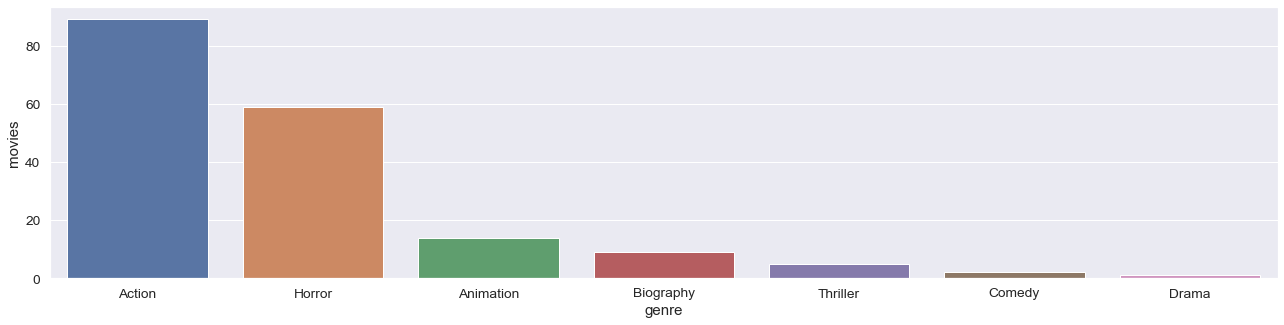

In [212]:
#User the Top 5 genre he watched 
User=pd.DataFrame(STC_IMDB[STC_IMDB['user_id_maped'] == 1168])
user_gen = pd.DataFrame(User['program_genre'].value_counts()).reset_index()
user_gen.columns = ['genre', 'movies']
#User Top 5 genre plot
plt.figure(figsize=(22,5))
sns.barplot(x='genre', y='movies', data=user_gen.head(7))
plt.show()

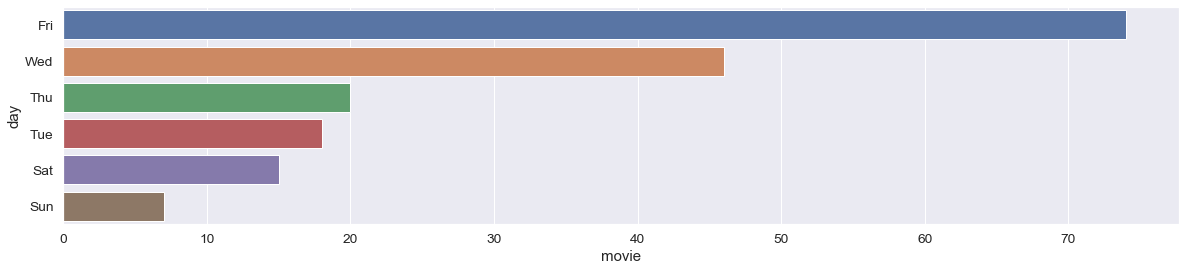

In [213]:
## number of movies user watched per days

user_days = pd.DataFrame(User['day'].value_counts()).reset_index()
user_days.columns = ['day', 'movie']
user_days.head(20)
## number of movies user watched per days
plt.figure(figsize=(20,4))
sns.barplot(x='movie', y='day', data=user_days.head(8))
plt.show()